# Analysis for csv files

## Load data file

In [59]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.optimize import curve_fit
from operator import itemgetter

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 20,
         'axes.titlesize':24,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
pylab.rcParams.update(params)

filename = 'python_with_c/data/data_20180419-175248.csv'

data = np.genfromtxt(filename, delimiter=',', skip_header=4)
data = sorted(data, key=itemgetter(0))
temp = np.array([i[0] for i in data])
mag = np.array([i[1] for i in data])
magstdev = np.array([i[2] for i in data])
energy = np.array([i[3] for i in data])
energystdev = np.array([i[4] for i in data])
chi = np.array([i[5] for i in data])
chi_stdev = np.array([i[6] for i in data])
c_v = np.array([i[7] for i in data])
c_v_stdev = np.array([i[8] for i in data])

In [ ]:
'''
#not multicore
temp = data[:,0]
mag = data[:,1]
magstdev = data[:,2]
energy = data[:,3]
energystdev = data[:,4]
magstd2 = data[:, 5]
energystd2 = data[:, 6]
'''

1.01

In [8]:
filename = 'python_with_c/data/corr_20180411-164705.csv'
corr = np.genfromtxt(filename, delimiter=',', skip_header=3)
corr = sorted(corr, key=itemgetter(0))
temp_corr = np.array([i[0] for i in corr])
k = np.array([i[1] for i in corr])
corr_length = np.array([i[2] for i in corr])

# Analysis for data.csv
- units: $k_b = 1$
- $|M|$, gives $T_c$
- $c_v$ = $\frac{\beta}{T}Var(E)$ = $\frac{1}{k_bT^2}Var(E)$, gives a log fit (theory: $\alpha = 0$) 
- $\chi$ = $\beta Var(|M|)$, gives $\gamma$ (theory: $\gamma = 7/4$)

In [44]:
#get t_c from |M| by guessing a value and plotting. 
def m_func(t):
    t_c = 2.22
    if t > t_c:
        return 0
    else:
        return np.real(float((1 - np.sinh(2/t)**(-4)))**(1/8))   

#from critical region
#def m_func(t, a, beta, c):
#    t_c = 2.26
#    return a*np.abs((t - t_c)/t_c)**beta + c

#params = curve_fit(m_func, temp[24:30], mag[24:30])
#print(params[0])

In [ ]:
#error for t_c

#write chi^2 analysis
t_c_chi2 = np.sum(/m)
#minimize chi^2 by changing t_c slightly 
#go to 2*chi^2 on either side by varying t_c and call that the error range. 

Text(0.5,0,'Temperature ($J/k_B$)')

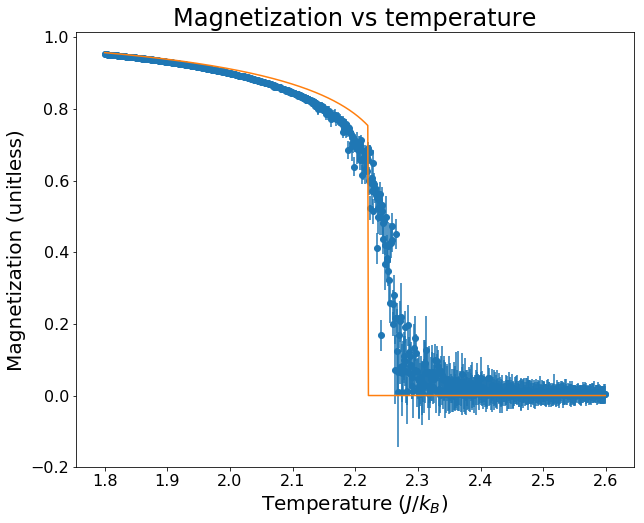

In [45]:
#|M| plotting

plt.scatter(temp, mag)
plt.errorbar(temp, mag, magstdev, linestyle='None')
plt.plot(temp, [m_func(i) for i in temp])
#plt.plot(temp[25:40], m_func(temp[25:40], params[0][0], params[0][1], params[0][2]), )
plt.title('Magnetization vs temperature')
plt.ylabel('Magnetization (unitless)')
plt.xlabel('Temperature ($J/k_B$)')

In [129]:
temp[26]

2.300000000000001

In [55]:
#fit for C_v and get critical exponent, alpha  
c_v2 = 1/(temp**2)*energystdev**2
c_v_stdev2 = 1/(temp**2)*energystd2/1000**0.5
#t_c found from M fit
t_c = 2.23
def cv_func(t, a):
    t_c = 2.23
    return a*np.log(np.abs((t - t_c)/t_c)) 

#remove data point near crit temperature
#temp = np.delete(temp, 26)
#energystdev = np.delete(energystdev, 26)
#mag = np.delete(mag, 26)
#magstdev = np.delete(magstdev, 26)
params_cv = curve_fit(cv_func, temp, c_v)

tempR = temp[440:] #temp[1240:1500] #165705
c_vR = c_v[440:] #c_v[1240:1500]
c_v_stdevR = c_v_stdev[440:]#c_v_stdev[1240:1500]
params_cvR = curve_fit(cv_func, tempR, c_vR, sigma=1/c_v_stdevR, absolute_sigma=True)

In [22]:
len(temp)

799

In [58]:
#chi^2 for fit. No error on alpha!!

c_v_chi2R = 1/(len(c_vR))*sum((cv_func(tempR, params_cvR[0][0]) - c_vR)**2/(c_v_stdevR**2))

print(c_v_chi2R)

0.2680774968382206


Text(0.5,0,'Temperature ($J/k_B$)')

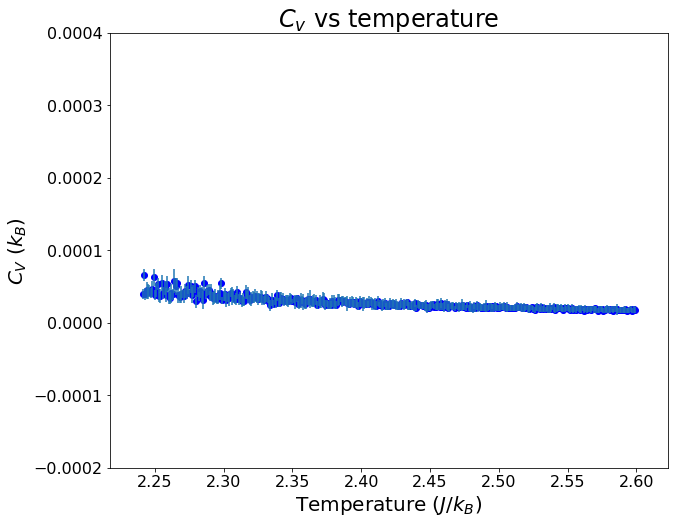

In [56]:
#C_v plotting

#only do above T_c

fig, ax_cv = plt.subplots()

ax_cv.scatter(tempR, c_vR, color='b')
ax_cv.set_ylim([-0.0002, 0.0004])
plt.errorbar(tempR, c_vR, c_v_stdevR, linestyle='None')
#plt.plot(tempR, cv_func(tempR, params_cvR[0][0]))#[cv_func(i, params[0][0], params[0][1]) for i in temp])
plt.title('$C_v$ vs temperature')
plt.ylabel('$C_V$ ($k_B$)')
plt.xlabel('Temperature ($J/k_B$)')

Text(0.5,0,'log_temperature (log $J/k_B$)')

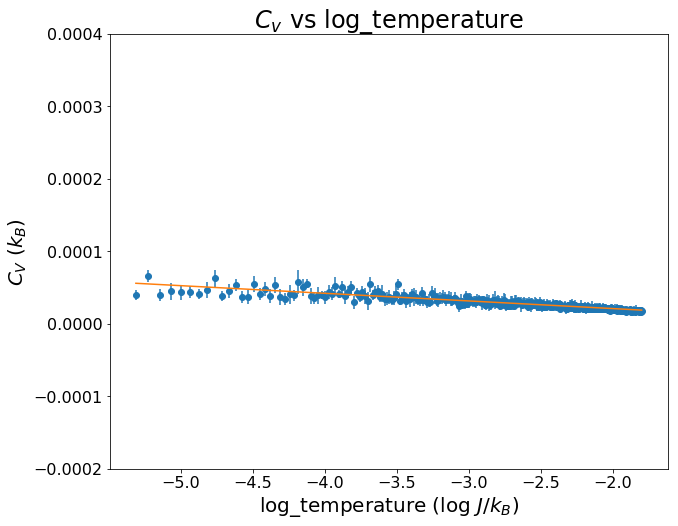

In [57]:
#C_v plotting, log linear 
fig, ax_cv = plt.subplots()


ax_cv.set_ylim([-0.0002, 0.0004])
ax_cv.scatter(np.log(np.abs(tempR-t_c)/t_c), c_vR)
plt.errorbar(np.log(np.abs(tempR-t_c)/t_c), c_vR, c_v_stdevR, linestyle='None')
plt.plot(np.log(np.abs(tempR-t_c)/t_c), cv_func(tempR, params_cvR[0][0]))#[cv_func(i, params[0][0], params[0][1]) for i in temp])
plt.title('$C_v$ vs log_temperature')
plt.ylabel('$C_V$ ($k_B$)')
plt.xlabel('log_temperature (log $J/k_B$)')

In [171]:
temp[1600]

2.6019999999998236

In [67]:
#fit for Chi and get critical exponent, gamma
chi = 1/temp*magstdev**2
#chi_stdev = 2/temp*magstd2*magstdev
def chi_func(t, a, gamma):
    t_c = 2.24
    return a*(np.abs((t - t_c)/t_c))**(-1*gamma)
    #log log version
    #return a - gamma*t
#the critical point data is still removed from c_v
#leftside
#params_chiL = curve_fit(chi_func, np.log(np.abs((temp-t_c)/t_c))[1000:1260], np.log(chi)[1000:1260])
tempR = temp[480:]#[1280:1500]
chiR = chi[480:]#[1280:1500]
chi_stdevR = chi_stdev[480:]#[1280:1500]
params_chiR = curve_fit(chi_func, tempR, chiR, sigma=1/chi_stdevR, absolute_sigma=True)

In [70]:
#get chi^2 of fit and error on gamma

chi_chi2R = 1/(len(chiR))*sum((chi_func(tempR, params_chiR[0][0], params_chiR[0][1]) - chiR)**2/(chi_stdevR**2))

print(chi_chi2R)

#gamma
params_chiR[0][1] #0.3

31.519382773972414


0.7976026483250722

Text(0.5,0,'temperature ($J/k_B$)')

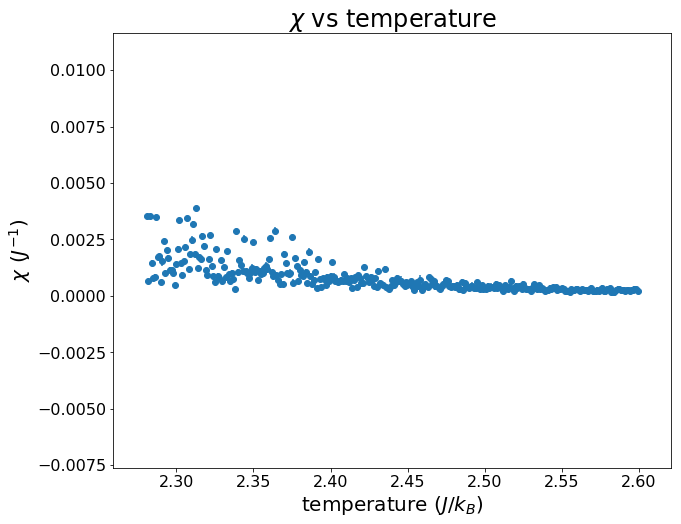

In [68]:
#Chi plotting
 
plt.scatter(temp[480:], chi[480:])
plt.errorbar(temp[480:], chi[480:], chi_stdev[480:], linestyle='None')
#plt.plot(temp, chi_func(temp, params_chi[0][0], params_chi[0][1]))
 
t_c = 2.24
#tempL = np.log(np.abs((temp-t_c)/t_c))[1000:1260]
#plt.scatter(np.log(np.abs((temp-t_c)/t_c))[1000:1260], np.log(chi)[1000:1260])
#plt.plot(tempL, chi_func(tempL, params_chiL[0][0], params_chiL[0][1]))

#plt.scatter(tempR, chiR)
#plt.errorbar(tempR, chiR, chi_stdevR, linestyle='None')
#plt.plot(tempR, chi_func(tempR, params_chiR[0][0], params_chiR[0][1]))
plt.title('$\chi$ vs temperature')
plt.ylabel('$\chi$ ($J^{-1}$)')
plt.xlabel('temperature ($J/k_B$)')


Text(0.5,0,'log temperature (log $J/k_B$)')

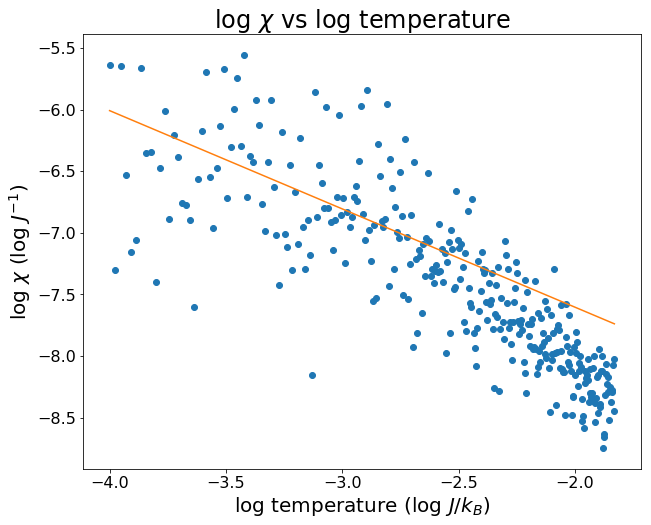

In [69]:
#Chi log-log plotting

plt.scatter(np.log(np.abs((tempR - t_c)/t_c)), np.log(chiR))
plt.errorbar(np.log(np.abs((tempR - t_c)/t_c)), np.log(chiR), chi_stdevR, linestyle='None')
plt.plot(np.log(np.abs((tempR - t_c)/t_c)), np.log(chi_func(tempR, params_chiR[0][0], params_chiR[0][1])))
plt.title('log $\chi$ vs log temperature')
plt.ylabel('log $\chi$ (log $J^{-1}$)')
plt.xlabel('log temperature (log $J/k_B$)')

# Analysis for corr.csv

- correlation length. At each temperature, find $\xi$, where $<\sigma(0)\sigma(x)>$ ~$e^{-x/\xi}$
- Then, plot the $\xi$ as a function of temperature and find the critical exponent $\nu$ where $\xi$ ~ $|t|^{-\nu}$. Expected $\nu$ = 1
- Pick a temperature close to t_c, and show that $<\sigma(0)\sigma(x)>$ ~ $|x|^{-\eta}$. Expected $\eta$ = 1/4.

In [23]:
def corr_func(x, a, xi):
    return a*np.e**(-1*x/xi)

params_t = curve_fit(corr_func, k[0:50], corr_length[0:50])

In [102]:
lattice_size = 100
numpts = int((lattice_size-2)/2)
temp_xi = []
xi = []
xi_stdev = []
#only consider temperatures > T_c ~ 2.27

#for 164705.csv
#get the starting index for which temperature is > T_c: 1285

for i in range(1285, int(len(temp_corr)/numpts)):
    params_t = curve_fit(corr_func, k[i*numpts:i*numpts+numpts+1], corr_length[i*numpts:i*numpts+numpts + 1])
    temp_xi.append(temp_corr[i*numpts])
    xi.append(params_t[0][1])
    xi_stdev.append(np.sqrt(np.diag(params_t[1]))[1]) #stdev

In [75]:
#finding temp_corr index for T_c
#len(temp_corr)
#temp_corr[63000]
#temp_corr[1285*49-1: 1285*49+1]

array([0.00272031, 0.14425837])

In [125]:
#fit Xi to temperature

def xi_func(t, a, nu):
    t_c = 2.27
    return a*(np.abs((t - t_c)/t_c))**(-1*nu)

#truncate temp_xi further to get into the critical region
temp_xi_trunc = temp_xi[0:400] #range of 2.2 to 2.7
xi_trunc = xi[0:400]
xi_err_trunc = xi_err[0:400]
params_xi = curve_fit(xi_func, temp_xi_trunc, xi_trunc)

params_xi[0]

array([0.99443162, 0.30678674])

In [122]:
temp_xi[400]

2.686999999999814

In [127]:
#chi2 of fit

xi_chi2 = 1/(len(temp_xi))*sum((np.array([xi_func(i, params_xi[0][0], params_xi[0][1]) 
                                         for i in temp_xi])- xi)**2/np.array(xi_stdev)**2)
xi_chi2

4.058790097060266

Text(0.5,0,'Temperature ($J/k_B$)')

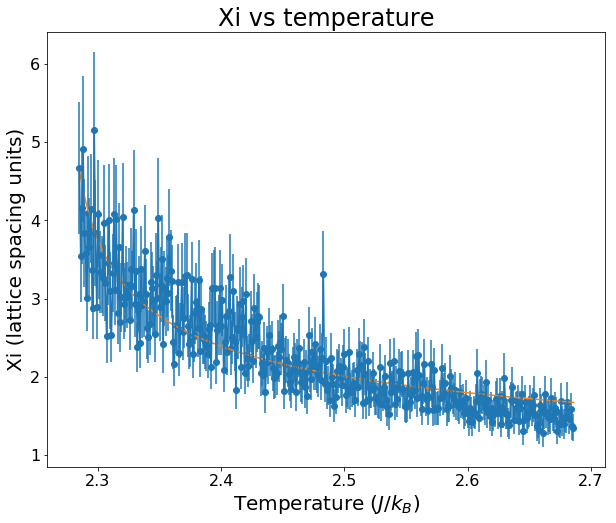

In [126]:
#plt.scatter(temp_corr,corr_length)

plt.scatter(temp_xi_trunc, xi_trunc)
plt.errorbar(temp_xi_trunc, xi_trunc, xi_err_trunc)
plt.plot(temp_xi_trunc, [xi_func(i, params_xi[0][0], params_xi[0][1]) for i in temp_xi_trunc])
plt.title('Xi vs temperature')
plt.ylabel('Xi (lattice spacing units)')
plt.xlabel('Temperature ($J/k_B$)')

In [137]:
def vals_func(x, a, eta):
    return a*x**(-1*eta)

In [138]:
#pick a temperature close to t_c, say 2.28
i = 1285
k_vals = k[i*numpts:i*numpts+numpts+1]
corr_length_vals = corr_length[i*numpts:i*numpts+numpts + 1]
params_vals = curve_fit(vals_func, k_vals, corr_length_vals)

In [139]:
params_vals

(array([0.00496276, 1.09869052]), array([[3.90945057e-07, 4.85602759e-05],
        [4.85602759e-05, 4.05058351e-02]]))

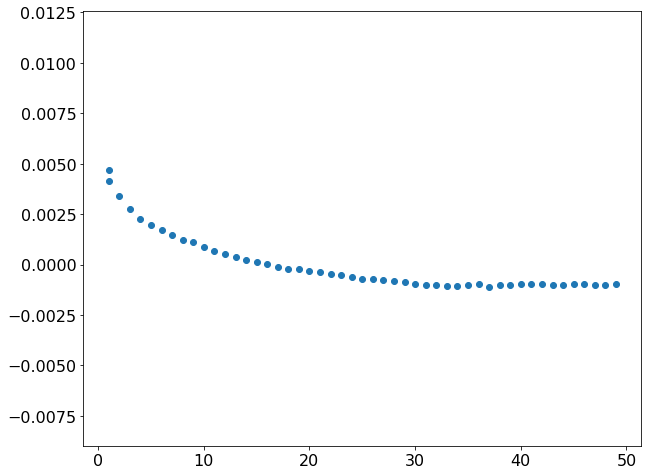

In [136]:
plt.scatter(k_vals, corr_length_vals)